In [1]:
#import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

# Aviation Accident Capstone:
## *Part V: K-Nearest Neighbor (KNN) Model*
Created by: Katy Christensen <br>
Created on: September 26, 2022 <br>
Created for: BrainStation Data Science Bootcamp Capstone<br>
Notebook 5 of 6<br>

Previous Notebook: *Part IV: Decision Tree Model* <br>

----
### Introduction
The final classification model tested is the KNN model which utilizes non-linear decision boundaries. KNN models do not handle categorical data even after dummy variable encoding due to the sensitivty to distance. Dummy variable encoding can lead to the model inferring inter-category or inter-feature when there may not be. Another drawback to KNN models is they are unable to predic values outside of the training set range. 

### Process 
Similar to the other models tested, the following steps will be taken when applying the KNN model to the NTSB data:
1. Load Data
2. Split Data
3. Model on Original Data
4. Optimize Model 
5. Fit Optimized Model to Train-Test Dat

----

## Table of Contents
[1. Load Data & Review](#Step-1) <br>
[2. Split Data](#Step-2) <br>
- [Train-Test Split](#train-test) <br>
- [Train-Validation SPlit](#val-split) <br>

[3. Baseline KNN Model](#Step-3) <br>
[4. Model Optimization](#Step-4) <br>
- [Model - Scaled Data](#scaled) <br>
- [Hyperparameter Optimization](#hp-tune) <br>
- [Model Tuning](#model-tune) <br>

[5. Final Model](#Step-5) <br>
[6. Results & Summary](#Results) <br>

----
<a id='Step-1'></a>
## 1. Load Data & Review
----

In [2]:
ntsb08 = pd.read_csv('data/ntsb08_model.csv')

In [3]:
X = ntsb08.drop(columns='ev_highest_injury')
y = ntsb08['ev_highest_injury']

In [4]:
X.shape

(64156, 10472)

---
<a id='Step-2'></a>
## 2. Split the Data
---
<a id='test-split'></a>
### Train-Test Split

In [5]:
#Split the test into train (70%) and test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6, stratify=y)

In [6]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (44909, 10472)
X_test shape: (19247, 10472)


<a id='val-split'></a>
### Train-Validation Split

In [7]:
#Split the test into train (80%) and test (20%)
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.2, 
                                                    random_state=12, stratify=y_train)

In [8]:
print('X_train2 shape:', X_train2.shape)
print('X_val shape:', X_val.shape)

X_train2 shape: (35927, 10472)
X_val shape: (8982, 10472)


---
<a id='Step-3'></a>
## 3. Baseline KNN Model
---
Running the default on the original data, the nearest neighbors (n_neighbors) value of 5 was used and the model was overfitting since the accuracy on the training data is 83% and the accuracy on the validation dataset is 79%. 

In [9]:
# Instantiate the model & fit it to our data
KNN_base = KNeighborsClassifier()
KNN_base.fit(X_train2, y_train2)

# Score the model on the test set
print("Number of neighbors:", KNN_base.n_neighbors)
print("Train accuracy:", KNN_base.score(X_train2, y_train2))
print("Test accuracy:", KNN_base.score(X_val, y_val))

Number of neighbors: 5
Train accuracy: 0.8295432404598213
Test accuracy: 0.7856824760632376


---
<a id='Step-4'></a>
## 4. Model Optimization
---
<a id='scaled'></a>
### KNN - Scaled Data
Since KNN is distance sensitive, the data is scaled and the KNN model was rerun on the scaled data. 

In [10]:
#Scale Data
scaler = StandardScaler()
scaler.fit(X_train2)

X_scale = scaler.transform(X_train2)
X_sval = scaler.transform(X_val)

In [11]:
# Instantiate the model & fit it to our data
KNN_scale = KNeighborsClassifier()
KNN_scale.fit(X_scale, y_train2)

# Score the model on the test set
print("Number of neighbors:", KNN_scale.n_neighbors)
print("Train accuracy:", KNN_scale.score(X_scale, y_train2))
print("Test accuracy:", KNN_scale.score(X_sval, y_val))

Number of neighbors: 5
Train accuracy: 0.8364461268683719
Test accuracy: 0.8042752171008684


**Comment:** The performance overall is a higher accuracy with a train accuracy score of 85% and test accuracy score of 81%, but the model is still overfitting. 

<a id='hp-tune'></a>
### Hyperparameter Optimization
Hyperparameters of high interest in KNN models are `n_neighbors` and defines the number of nearest neighbors that define a set. `weights` is the other hyperparameter and will alter the value of a point based on distance. The default for these hyperparameters are 5 and *uniform* by default. Of interest in this project is the `n_neighbors` hyperparameter and was the only hyperparameter optimized. 

In [12]:
neighbors = range(1, 21, 2) 
# range is a list iterator
# X_train.shape[0] = working in the first dimension of the array
#2 = step size so only odd numbers show up

train_acc = []
test_acc = []

for n in neighbors: 
    print(f"Working on my model with {n} neighbors...", end="\r")
    
    #Instantiate and Fit
    KNN_model = KNeighborsClassifier(n_neighbors=n)
    KNN_model.fit(X_scale, y_train2)
    
    #Score the model
    train_accuracy = KNN_model.score(X_scale, y_train2)
    test_accuracy = KNN_model.score(X_sval, y_val)
    
    #Append my accuracy
    train_acc.append(train_accuracy)
    test_acc.append(test_accuracy)

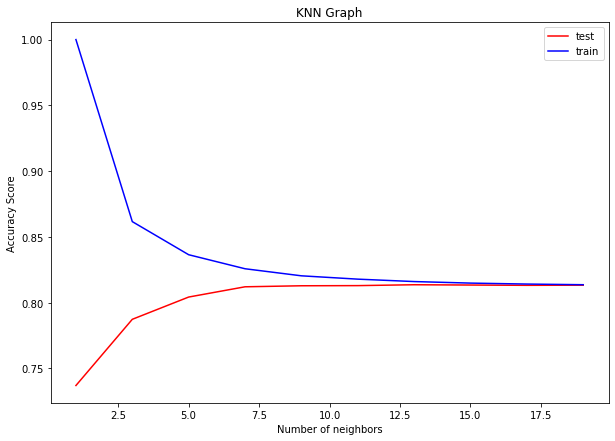

In [13]:
#plot the graph
plt.figure(figsize=(10,7))
plt.plot(neighbors, test_acc, color="red", label="test")
plt.plot(neighbors, train_acc, color="blue", label="train")
plt.ylabel("Accuracy Score")
plt.xlabel("Number of neighbors")
plt.title("KNN Graph")
plt.legend()
plt.show()

**Comment:** For k-values (variable for n_neighbors) below 6 the train data is siginificantly overfitting. Best k-values are when the train and test accuracy are close and the test accuracy remains below the training accuraracy. An optimal k-values balances the best accuracy while also minimizing the difference between the training and test accuracy. Using the NumPy `argmax`, the optimal k-value can be determined (see below).

In [14]:
#index value that is the largest in the test accuracy
index_of_max = np.argmax(test_acc)

#the corresponding coordinate k value
best_k = neighbors[index_of_max]
print(f'Best KNN k value: {best_k}')

Best KNN k value: 13


k = 13 is returns the best KNN model results. This k-value will be used when refitting the KNN model to the scaled data. 

In [15]:
# Instantiate the model & fit it to our data
KNN_scale2 = KNeighborsClassifier(n_neighbors=13)
KNN_scale2.fit(X_scale, y_train2)

# Score the model on the test set
print("Train accuracy:", KNN_scale.score(X_scale, y_train2))
print("Test accuracy:", KNN_scale.score(X_sval, y_val))

Train accuracy: 0.8364461268683719
Test accuracy: 0.8042752171008684


**Comment:** The results did not change very much, using a pipeline a combination of transformations and hyperparameter tuning can be tested. The pipeline will evaluate model performance when the data is scaled, a PCA transformation is applied, and the use of different k-values. 

<a id='model-tune'></a>
### Model Tuning

In [32]:
# Create placeholders for the three steps of scaling, dimention reduction, and model
estimators = [
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier())
]
model_pipe = Pipeline(estimators)
param_grid = [
    {
        'scaler': [StandardScaler()],
        'model': [KNeighborsClassifier()],
        'model__n_neighbors': [5, 7, 9, 13],
    }
]

grid = GridSearchCV(model_pipe, param_grid, cv=5)
gridsearch = grid.fit(X_train2, y_train2)   

In [33]:
gridsearch.best_params_

{'model': KNeighborsClassifier(n_neighbors=13),
 'model__n_neighbors': 13,
 'scaler': StandardScaler()}

In [22]:
# Instantiate the model & fit it to our data
KNN_scale = KNeighborsClassifier(n_neighbors=13)
KNN_scale.fit(X_train_PCA, y_train2)

# Score the model on the test set
print("Train accuracy:", KNN_scale.score(X_train_PCA, y_train2))
print("Test accuracy:", KNN_scale.score(X_val_PCA, y_val))

Train accuracy: 0.8128148746068417
Test accuracy: 0.8087285682476063


---
<a id='Step-5'></a>
## 5. Final Model
---
Taking into consideration the results from the model optimization steps taken the best parameters are utilized and then the final model is run against the scaled original training data and the test data.

In [23]:
# Scale data
scaler = StandardScaler()
scaler.fit(X_train)

X_scale_full = scaler.transform(X_train)
X_scale_test = scaler.transform(X_test)

In [31]:
# Instantiate the model & fit to data
KNN_final = KNeighborsClassifier(n_neighbors=13)
KNN_final.fit(X_scale_full, y_train)

# Score the model on the test set
print("Train accuracy:", KNN_final.score(X_scale_full, y_train))
print("Test accuracy:", KNN_final.score(X_scale_test, y_test))

Train accuracy: 0.8161615711772696
Test accuracy: 0.8123343897750299


---
<a id='Results'></a>
## 6. Results & Summary 
---
In this portion of the project, a KNN model was applied and optimized on the `n_neighbors` hyperparameter. The final k value used was 13 and the data was scaled for the best performance. After initial trial-and-error, PCA transformation was not included as it did not seem to affect the model. 
The final model performed below the initial baseline model, however it no longer overfits so the model performance did improve overall. 

---
#### <div align = "right">Up Next:</div>
<div align = "right">Aviation Accident Captson Part VI: Model Selection & Evaluation</div>